In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fft import fft, ifft
import pandas as pd
import glob
import sipm.util.functions as func
from datetime import datetime
plt.style.use('darkside')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
!pwd

/home/as111/sipm-analysis


In [3]:
# data folder
path = "/scratch/gpfs/as111/results/2023-12-13"
data_spe = {}
channels = np.arange(8)
voltages = [92,94,96,98,100]
for ch in channels:
    data_spe[ch] = {}
    for volt in voltages:
        data_spe[ch][volt] = {'n_spe_wfs':0, 'avg_spe_wf':np.zeros(0), 'time':np.zeros(0)}
        files = glob.glob(f"{path}/*volt_{volt}*laser_waveform_liq5.h5")
        print(files)
        for f in files:
            df = pd.read_hdf(f, key=f'{volt}/{ch}')
            data_spe[ch][volt]['n_spe_wfs'] += np.array(df['n_spe_wfs'])[0]
            if data_spe[ch][volt]['time'].shape[0]==0:
                data_spe[ch][volt]['time'] = np.array(df['time'])
            if np.array(df['n_spe_wfs'])[0]>0:
                if data_spe[ch][volt]['avg_spe_wf'].shape[0]==0:
                    data_spe[ch][volt]['avg_spe_wf'] = np.array(df['avg_spe_wf'])*np.array(df['n_spe_wfs'])[0]
                else:
                    data_spe[ch][volt]['avg_spe_wf'] += np.array(df['avg_spe_wf'])*np.array(df['n_spe_wfs'])[0]
        df = None
        if data_spe[ch][volt]['n_spe_wfs']>0:
            data_spe[ch][volt]['avg_spe_wf'] /= data_spe[ch][volt]['n_spe_wfs']

['/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_92_light_laser_cond_ar_run5_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_92_light_laser_cond_ar_run9_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_92_light_laser_cond_ar_run6_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_92_light_laser_cond_ar_run0_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_92_light_laser_cond_ar_run7_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_92_light_laser_cond_ar_run3_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_92_light_laser_cond_ar_run2_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_92_light_laser_cond_ar_run8_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_92_light_laser_cond_ar_run4_laser_waveform_liq5.h5', '/scratch/gpfs/as1

ch0 92V 66278 waveforms selected
ch1 92V 98071 waveforms selected
ch2 92V 86450 waveforms selected
ch3 92V 109761 waveforms selected
ch4 92V 120410 waveforms selected
ch5 92V 81059 waveforms selected
ch6 92V 52532 waveforms selected
ch7 92V 45819 waveforms selected
ch0 94V 60265 waveforms selected
ch1 94V 91208 waveforms selected
ch2 94V 80435 waveforms selected
ch3 94V 102508 waveforms selected
ch4 94V 109871 waveforms selected
ch5 94V 85215 waveforms selected
ch6 94V 44139 waveforms selected
ch7 94V 37765 waveforms selected
ch0 96V 55187 waveforms selected
ch1 96V 86418 waveforms selected
ch2 96V 76108 waveforms selected
ch3 96V 97562 waveforms selected
ch4 96V 103056 waveforms selected
ch5 96V 79070 waveforms selected
ch6 96V 39137 waveforms selected
ch7 96V 33793 waveforms selected
ch0 98V 52879 waveforms selected
ch1 98V 82160 waveforms selected
ch2 98V 72423 waveforms selected
ch3 98V 94015 waveforms selected
ch4 98V 98072 waveforms selected
ch5 98V 81018 waveforms selected
ch6 9

Text(0.07, 0.5, 'Amplitude (ADC Unit)')

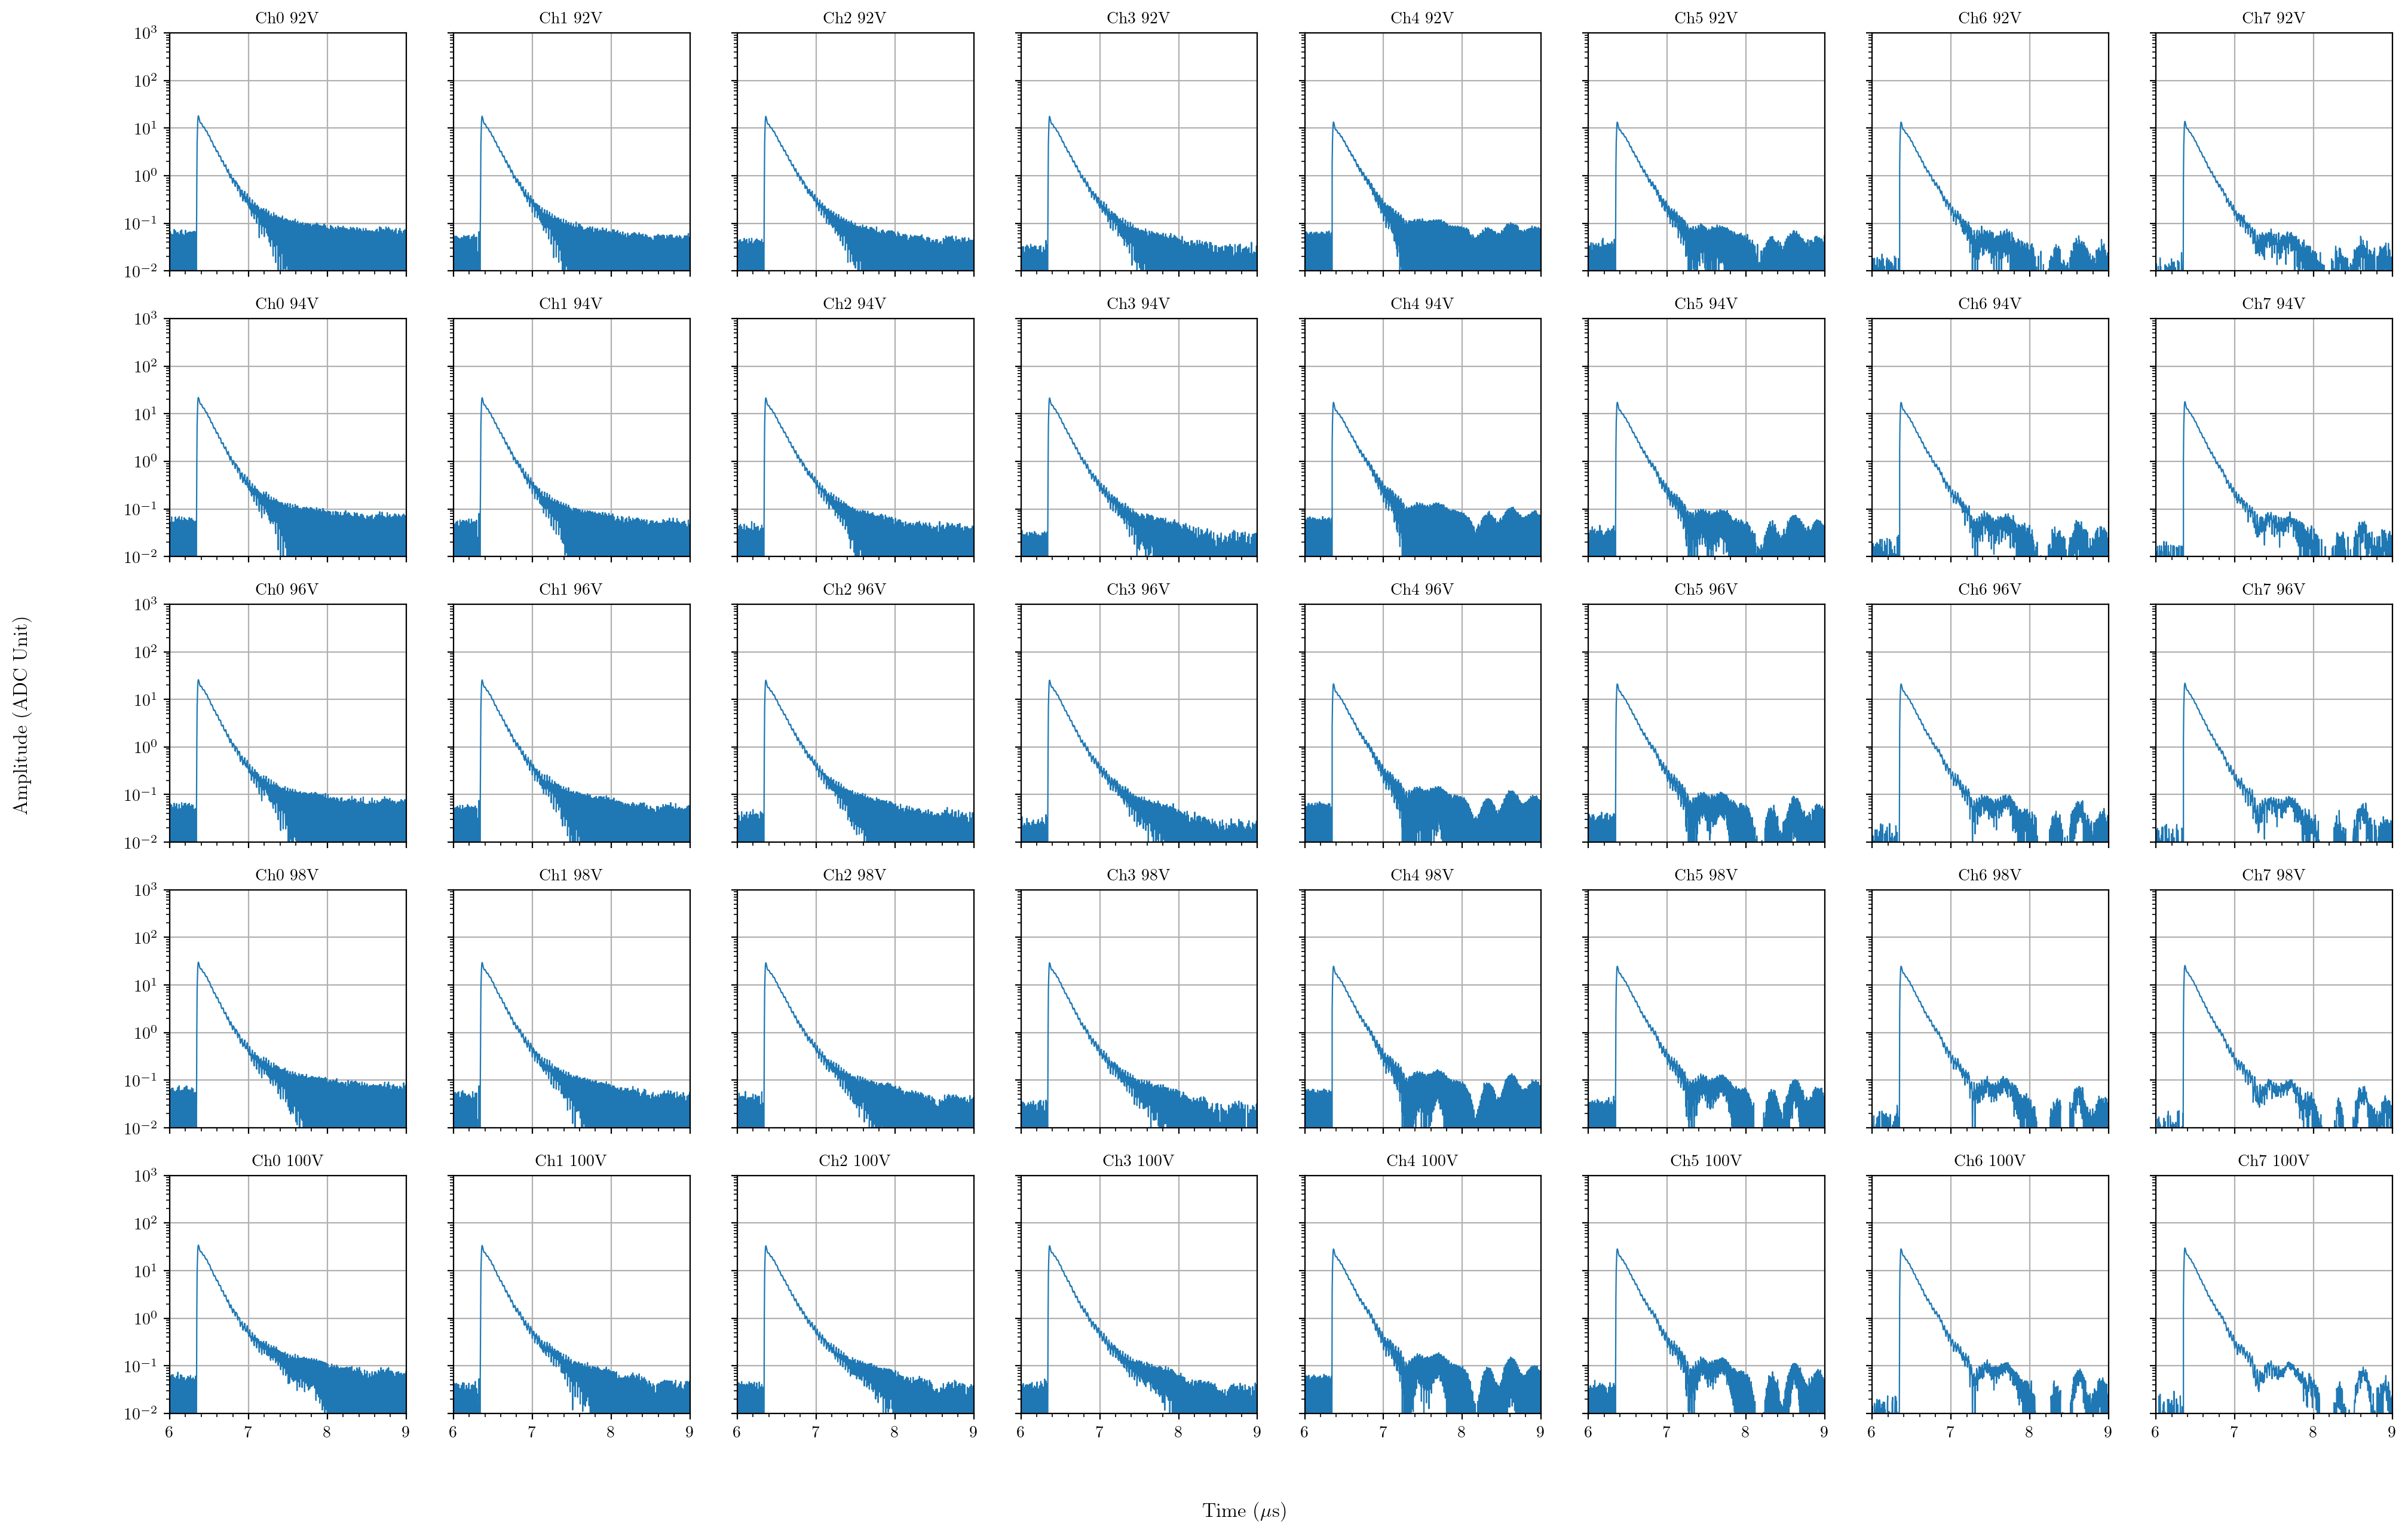

In [4]:
# Make plots for all datasets
# SPE average waveform
fig, axs = plt.subplots(len(voltages), len(channels), sharex=True, sharey=True)
fig.set_size_inches(len(channels)*3, len(voltages)*3)
for i, volt in enumerate(voltages):
    for j, ch in enumerate(channels):
        if data_spe[ch][volt]['n_spe_wfs']>0:
            print(f'ch{ch} {volt}V {data_spe[ch][volt]["n_spe_wfs"]:.0f} waveforms selected')
            axs[i, j].plot(
                data_spe[ch][volt]['time'],
                data_spe[ch][volt]['avg_spe_wf'],linewidth=0.8)
        axs[i, j].set_xlim(6, 9)
        axs[i, j].set_ylim(1e-2, 1e3)
        axs[i, j].set_yscale('log')
        axs[i, j].minorticks_on()
        axs[i, j].grid()
        axs[i, j].set_title(f'Ch{ch} {volt}V')
fig.supxlabel(r'Time ($\mu$s)', y=0.05)
fig.supylabel(r'Amplitude (ADC Unit)', x=0.07)

## FFT

Text(0.07, 0.5, 'FFT Abs. Amplitude (ADC Unit)')

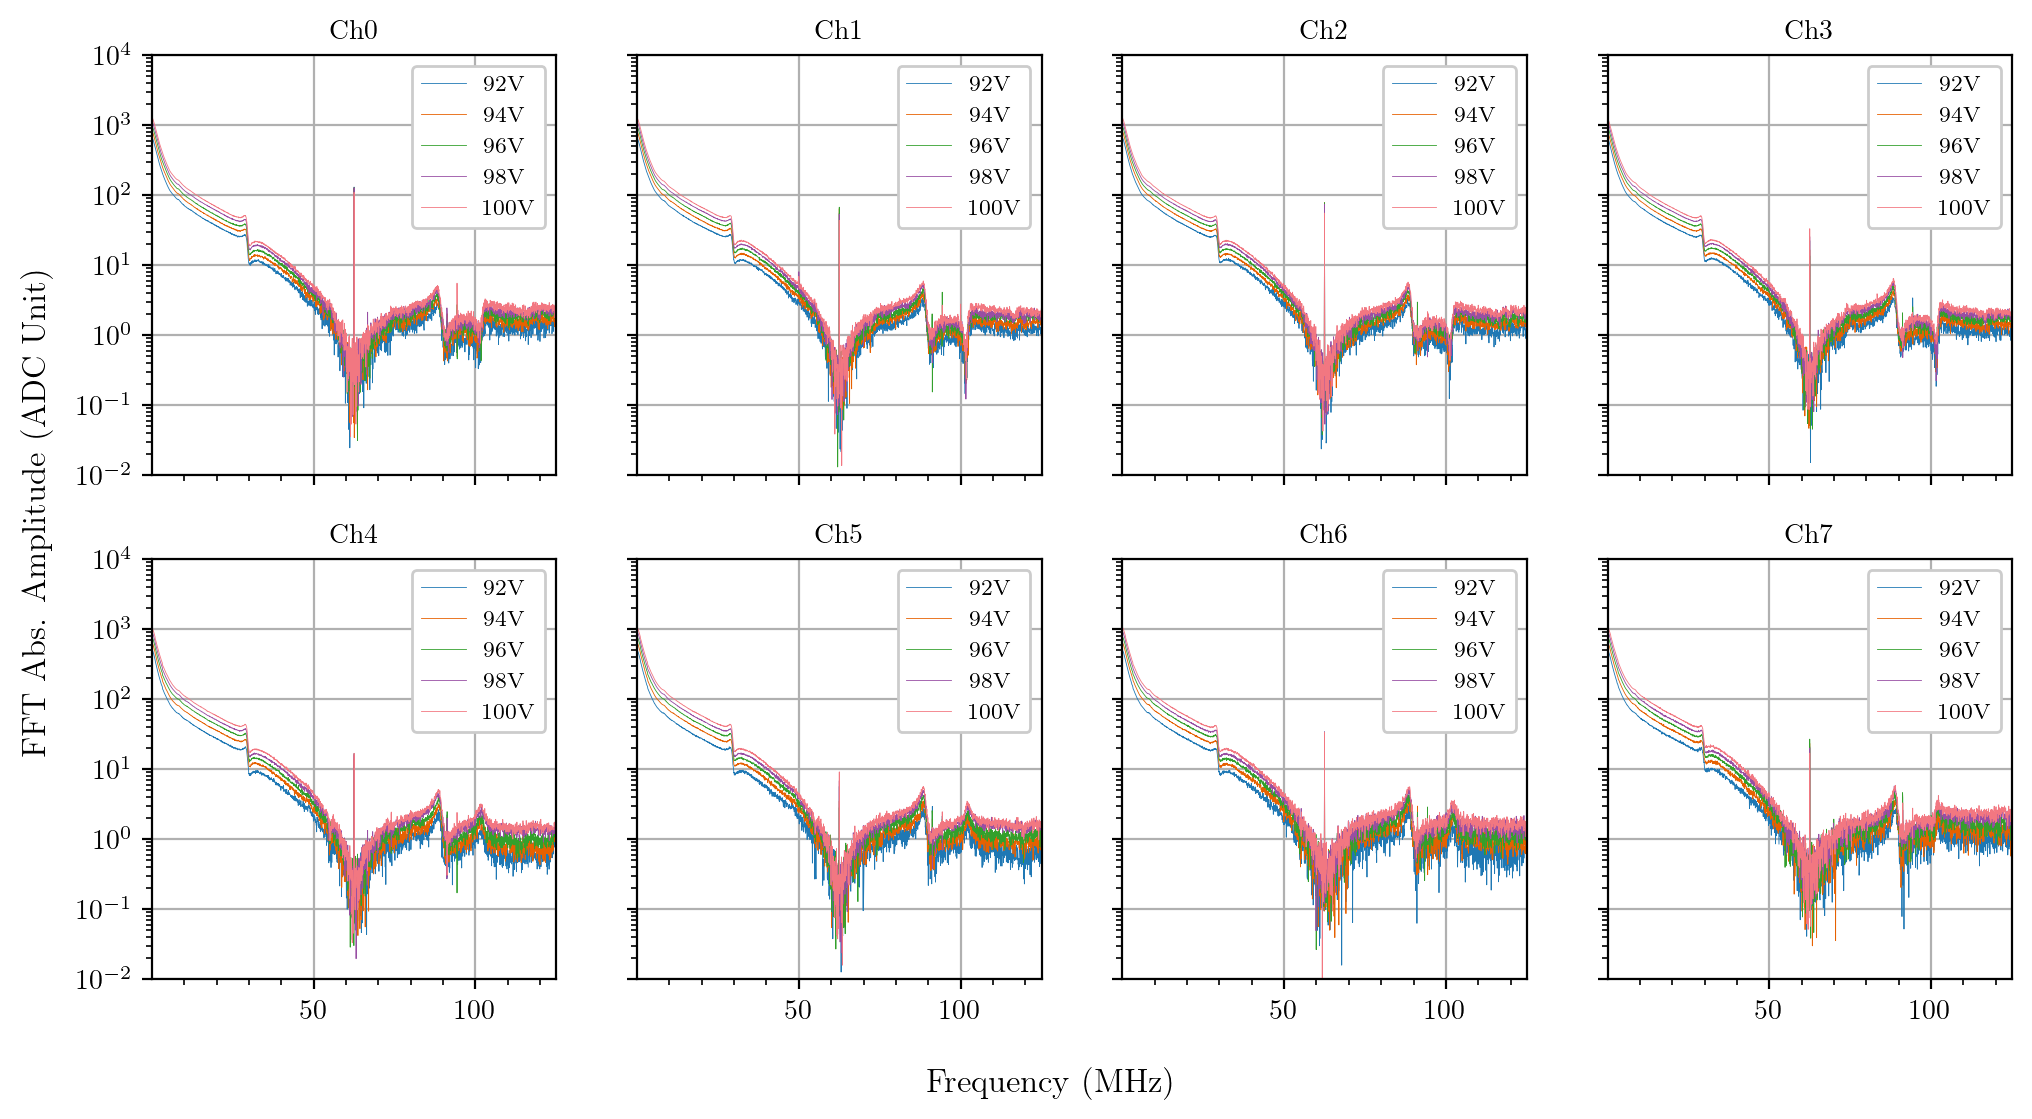

In [5]:
# Make plots for all datasets
# SPE average waveform
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True)
fig.set_size_inches(12, 6)
for j, ch in enumerate(channels):
    for k, volt in enumerate(voltages):
        data_spe[ch][volt]['fft_spe_wf'] = fft(data_spe[ch][volt]['avg_spe_wf'])
        dt = data_spe[ch][volt]['time'][1]-data_spe[ch][volt]['time'][0]
        t_total = dt+data_spe[ch][volt]['time'][-1]
        n_over_2 = int(data_spe[ch][volt]['time'].shape[0]/2)
        data_spe[ch][volt]['frequency'] = data_spe[ch][volt]['time']/dt/t_total
        axs[j//4,j%4].plot(
            data_spe[ch][volt]['frequency'][:n_over_2],
            abs(data_spe[ch][volt]['fft_spe_wf'][:n_over_2]),
            label=f'{volt}V', color=f'C{k}', linewidth=0.3)
    axs[j//4,j%4].legend(loc='upper right')
    axs[j//4,j%4].set_xlim(data_spe[ch][volt]['frequency'][1], data_spe[ch][volt]['frequency'][n_over_2])
    # axs[i, j].set_xlim(0,5)
    axs[j//4,j%4].set_ylim(1e-2, 1e4)
    # axs[i, j].set_xscale('log')
    axs[j//4,j%4].set_yscale('log')
    axs[j//4,j%4].minorticks_on()
    axs[j//4,j%4].grid()
    axs[j//4,j%4].set_title(f'Ch{ch}')
fig.supxlabel(r'Frequency (MHz)', y=0.01)
fig.supylabel(r'FFT Abs. Amplitude (ADC Unit)', x=0.07)

# Fit: exponential pulses with time jitter
Scintillation pulse (one component):
$$h(t,t') = A e^{-\frac{t-t'}{\tau}} \Theta(t-t')$$
Time jitter:
$$g(t') = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(t'-t_0)^2}{2\sigma^2}}$$
Average waveform:
$$
f(t,t') = \int g(t') h(t,t') \, dt'
= \frac{A}{\sigma\sqrt{2\pi}} \int_{-\infty}^{t} e^{-\frac{(t'-t_0)^2}{2\sigma^2}-\frac{t-t'}{\tau}} \, dt'$$

$$ = \frac{A}{\sigma\sqrt{2\pi}} \int_{-\infty}^{t} e^{-\frac{1}{2\sigma^2}[t^{'2} - 2t'(t_0 + \sigma^2/\tau) + t_0^2 + 2\sigma^2 t_0/\tau + \sigma^4 /\tau^2 + 2\sigma^2 (t-t_0)/\tau - \sigma^4/\tau^2]} \, dt'
$$

$$
= \frac{Ae^{\frac{\sigma^2}{2\tau^2}}}{\sigma\sqrt{2\pi}} e^{-\frac{t-t_0}{\tau}} \int_{-\infty}^{t} e^{-\frac{1}{2\sigma^2}[t'-(t_0 + \sigma^2/\tau)]^2} \, dt'
$$

$$
= \frac{Ae^{\frac{\sigma^2}{2\tau^2}}}{\sqrt{\pi}} e^{-\frac{t-t_0}{\tau}} \int_{-\infty}^{t/\sigma\sqrt{2}} e^{-[x'-\frac{t_0 + \sigma^2/\tau}{\sigma\sqrt{2}}]^2} \, dx'
$$

$$
= \frac{Ae^{\frac{\sigma^2}{2\tau^2}}}{2} e^{-\frac{t-t_0}{\tau}} \left[1 + erf\left(\frac{t-t_0-\sigma^2/\tau}{\sigma\sqrt{2}}\right)\right]
$$
We include two scintillation pulse components with distinct $\tau$.

In [27]:
def template(t, a_1, tau_1, sigma, t0):
        return func.pulse_jitter(t, a_1, tau_1, sigma, t0)

In [29]:
# Fit SPE average waveform
for j, ch in enumerate(channels):
    for k, volt in enumerate(voltages):
        pretrg = 5 #us
        err = np.std(data_spe[ch][volt]['avg_spe_wf'][data_spe[ch][volt]['time']<pretrg])
        fit_range = [6.2,7.5] #us
        range_arr = (data_spe[ch][volt]['time']<fit_range[1])&(data_spe[ch][volt]['time']>fit_range[0])
        # print(pos,ch,volt)
        # print(data_spe[pos][ch][volt]['time'][range_arr])
        # print(data_spe[pos][ch][volt]['avg_spe_wf'][range_arr])
        popt,pcov = curve_fit(
            template,
            data_spe[ch][volt]['time'][range_arr], 
            data_spe[ch][volt]['avg_spe_wf'][range_arr], 
            p0=[20, 0.15, 0.005, 6.35], sigma=err*np.ones(np.sum(range_arr)), maxfev=100000)
        data_spe[ch][volt]['pars'] = popt
        data_spe[ch][volt]['cov'] = pcov
        print(popt)

[1.80903505e+01 1.46486917e-01 4.77316813e-03 6.35162194e+00]
[2.23693120e+01 1.45023803e-01 4.89314075e-03 6.35177877e+00]
[2.65780579e+01 1.45112288e-01 4.96838327e-03 6.35184351e+00]
[3.09271460e+01 1.45309746e-01 4.96972014e-03 6.35196637e+00]
[3.54155591e+01 1.45880579e-01 5.02069461e-03 6.35200159e+00]
[1.74768287e+01 1.47248542e-01 4.61572737e-03 6.35171183e+00]
[2.15820195e+01 1.46646234e-01 4.69539447e-03 6.35182532e+00]
[2.56349227e+01 1.46841885e-01 4.73911189e-03 6.35187043e+00]
[2.97939879e+01 1.46885105e-01 4.76902608e-03 6.35197001e+00]
[3.40397855e+01 1.47018955e-01 4.82249400e-03 6.35206208e+00]
[1.71310396e+01 1.52338260e-01 4.53538305e-03 6.35128630e+00]
[2.11056740e+01 1.51122549e-01 4.61163787e-03 6.35140778e+00]
[2.50537340e+01 1.50820430e-01 4.66698273e-03 6.35142886e+00]
[2.90365162e+01 1.50954842e-01 4.68195915e-03 6.35151421e+00]
[3.31227016e+01 1.51009012e-01 4.72523042e-03 6.35159209e+00]
[1.73138850e+01 1.48148190e-01 4.59196327e-03 6.35135363e+00]
[2.13604

Text(0.07, 0.5, 'Amplitude (ADC Unit)')

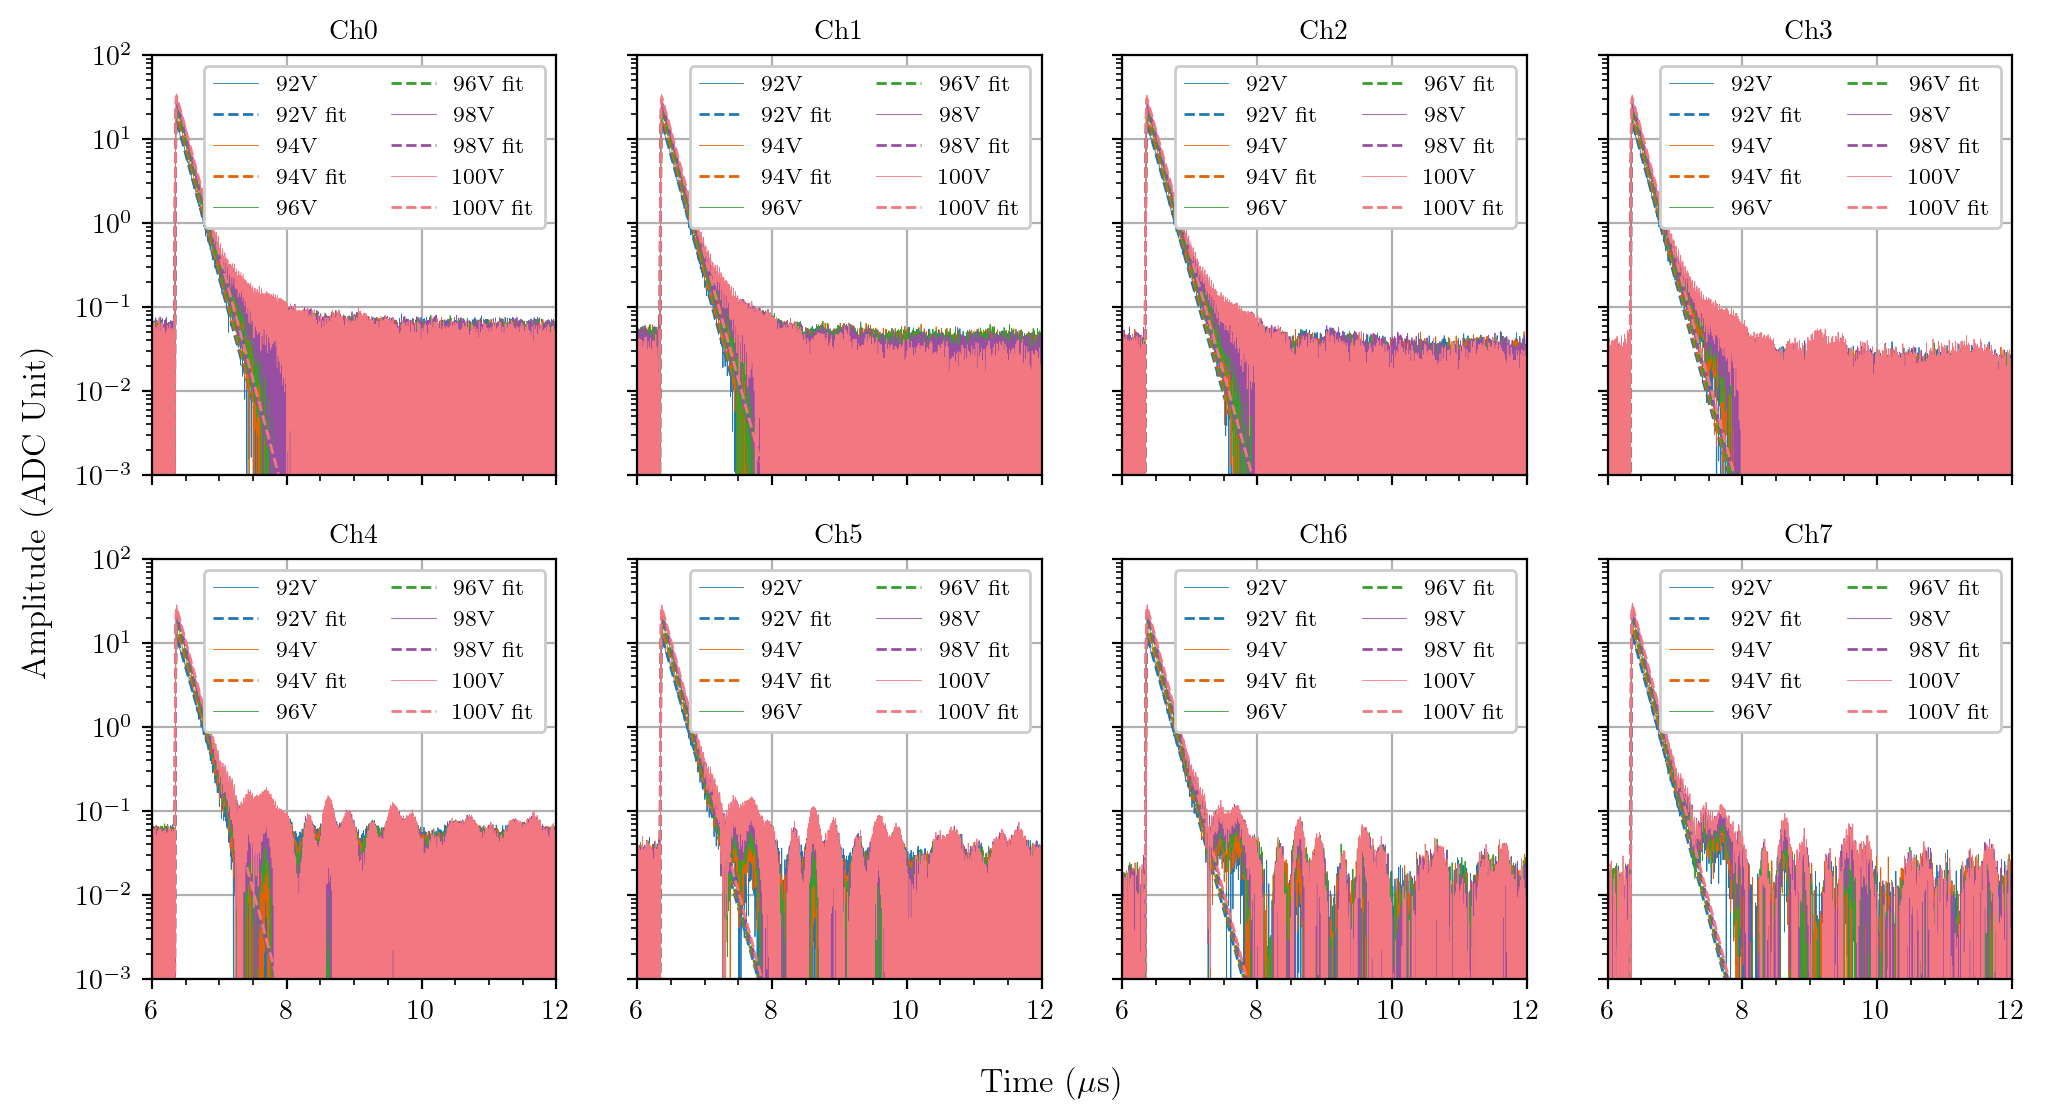

In [30]:
# Make plots for all datasets
# Fitted SPE average waveform
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True)
fig.set_size_inches(12, 6)
for j, ch in enumerate(channels):
    for k, volt in enumerate(voltages):
        axs[j//4,j%4].plot(
            data_spe[ch][volt]['time'],
            data_spe[ch][volt]['avg_spe_wf'],
            label=f'{volt}V', color=f'C{k}', linewidth=0.3)
        axs[j//4,j%4].plot(
            data_spe[ch][volt]['time'],
            template(data_spe[ch][volt]['time'], *data_spe[ch][volt]['pars']),
            label=f'{volt}V fit', color=f'C{k}', linestyle='--', linewidth=1)
    axs[j//4,j%4].legend(loc='upper right',ncol=2)
    axs[j//4,j%4].set_xlim(6, 12)
    axs[j//4,j%4].set_ylim(1e-3, 1e2)
    axs[j//4,j%4].set_yscale('log')
    axs[j//4,j%4].minorticks_on()
    axs[j//4,j%4].grid()
    axs[j//4,j%4].set_title(f'Ch{ch}')
fig.supxlabel(r'Time ($\mu$s)', y=0.01)
fig.supylabel(r'Amplitude (ADC Unit)', x=0.07)

In [31]:
# Fit result container
# Initialize
spe_fit = {}
for ch in channels:
    spe_fit[ch] = {}

In [32]:
for j, ch in enumerate(channels):
        spe_fit[ch]['volts'] = np.array(voltages)
        spe_fit[ch]['a1'] = np.array([data_spe[ch][volt]['pars'][0] for volt in voltages])
        spe_fit[ch]['tau1'] = np.array([data_spe[ch][volt]['pars'][1] for volt in voltages])
        spe_fit[ch]['a1err'] = np.array([func.error_distance(df=6, sigma=1)*np.sqrt(data_spe[ch][volt]['cov'][0, 0]) for volt in voltages])
        spe_fit[ch]['tau1err'] = np.array([func.error_distance(df=6, sigma=1)*np.sqrt(data_spe[ch][volt]['cov'][1, 1]) for volt in voltages])

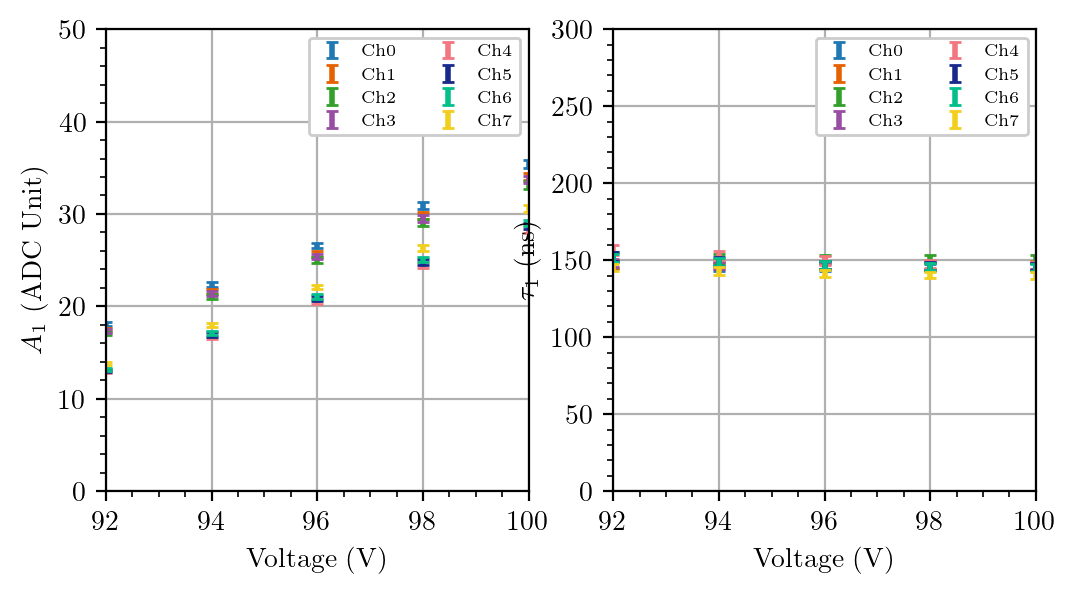

In [39]:
# Make plots for all parameters
# SPE average waveform
fig, axs = plt.subplots(1, 2, sharex=False, sharey=False)
fig.set_size_inches(6, 3)
for j, ch in enumerate(channels):
    axs[0].errorbar(
        spe_fit[ch]['volts'],
        spe_fit[ch]['a1'],
        yerr=spe_fit[ch]['a1err'],
        label=f'Ch{ch}', color=f'C{j}', linestyle='')
    axs[0].set_ylabel(r'$A_1$ (ADC Unit)')
    axs[0].set_ylim(0,50)
   
    axs[1].errorbar(
        spe_fit[ch]['volts'],
        spe_fit[ch]['tau1']*1e3,
        yerr=spe_fit[ch]['tau1err']*1e3,
        label=f'Ch{ch}', color=f'C{j}', linestyle='')
    axs[1].set_ylabel(r'$\tau_1$ (ns)')
    axs[1].set_ylim(0,300)

for i in range(2):
    axs[i].set_xlabel('Voltage (V)')
    axs[i].legend(loc='upper right',ncol=2,fontsize=6)
    axs[i].minorticks_on()
    axs[i].grid()